# Data Preprocessing


<img src="https://github.com/awantik/machine-learning-slides/blob/master/ML-Pipeline.png?raw=true">

## Agenda
1. Introduction to Preprocessing
2. StandardScaler
3. MinMaxScaler
4. RobustScaler
5. Normalization
6. Binarization
7. Encoding Categorical (Ordinal & Nominal) Features
8. Imputation
9. Polynomial Features
10. Custom Transformer
11. Text Processing
12. CountVectorizer
13. TfIdf
14. HashingVectorizer
15. Image using skimage

WHERE DO WE USE THEM AND WHERE DON'T WE USE THEM?

#### Common import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Introduction to PreProcessing
* Learning algorithms have affinity towards certain pattern of data.
* Unscaled or unstandardized data have might have unacceptable prediction
* Learning algorithms understands only number, converting text image to number is required
* Preprocessing refers to transformation before feeding to machine learning


<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp5.PNG?raw=true">


## 2. StandardScaler

Standardization is a preprocessing method used to transform continuous data to make it look normally distributed.

In scikit-learn, this is often a necessary step, because many models assume that the data you are training on is normally distributed, and if it isn't, you risk biasing your model. 

* The StandardScaler assumes your data is normally distributed (continuous numerical data) within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.
* Calculate - Subtract mean of column & div by standard deviation



<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp4.PNG?raw=true">

When to standardize:
* Models in linear space
* Dataset features have high variance 
* If data is not normally distributed, this is not the best scaler to use.

In [2]:
#Generating normally distributed data

df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

In [3]:
df

,x1,x2,x3
0,-3.296249,4.931971,-7.216118
1,0.475958,1.458707,1.656714
2,0.680759,4.884186,0.515596
3,0.996473,2.359106,-1.417666
4,0.690366,3.751034,-4.784252
...,...,...,...
9995,-1.098323,8.468221,-9.295648
9996,-3.391465,4.190522,2.132803
9997,2.552231,5.280554,-10.242876
9998,1.012101,4.923474,-3.749063


<Axes: ylabel='Density'>

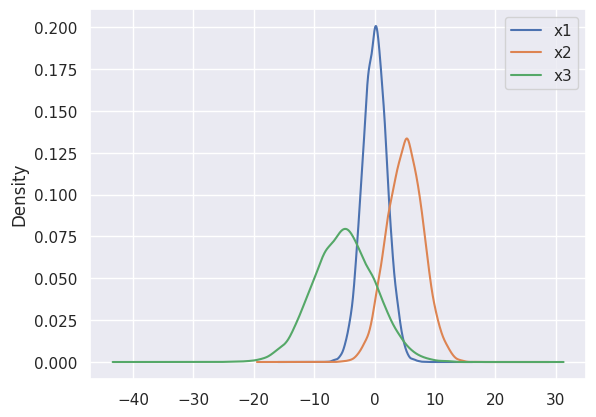

In [5]:
# plotting data

df.plot.kde()

In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [8]:
data_tf = ss.fit_transform(df)

In [9]:
data_tf

array([[-1.65713533, -0.03439141, -0.43739858],
       [ 0.22308386, -1.19765498,  1.32187523],
       [ 0.32516474, -0.05039561,  1.09561836],
       ...,
       [ 1.2579817 ,  0.08235567, -1.03753336],
       [ 0.49031898, -0.03723738,  0.25003684],
       [ 1.25760178, -0.72929141,  0.78094497]], shape=(10000, 3))

In [10]:
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])
df

,x1,x2,x3
0,-1.657135,-0.034391,-0.437399
1,0.223084,-1.197655,1.321875
2,0.325165,-0.050396,1.095618
3,0.482530,-0.896094,0.712298
4,0.329953,-0.429910,0.044783
...,...,...,...
9995,-0.561601,1.149967,-0.849720
9996,-1.704594,-0.282717,1.416272
9997,1.257982,0.082356,-1.037533
9998,0.490319,-0.037237,0.250037


<Axes: ylabel='Density'>

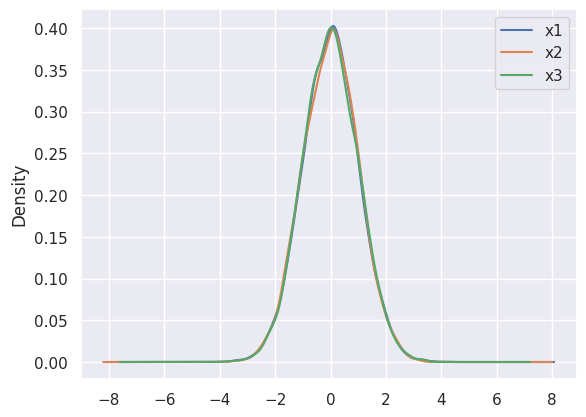

In [11]:
df.plot.kde()

## 3. MinMaxScaler
* One of the most popular
* Calculate - Subtract min of column & div by difference between max & min




<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp3.PNG?raw=true">



* Data shifts between 0 & 1
* If distribution not suitable for StandardScaler, this scaler works out.
* Sensitive to outliers

In [12]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

<Axes: ylabel='Density'>

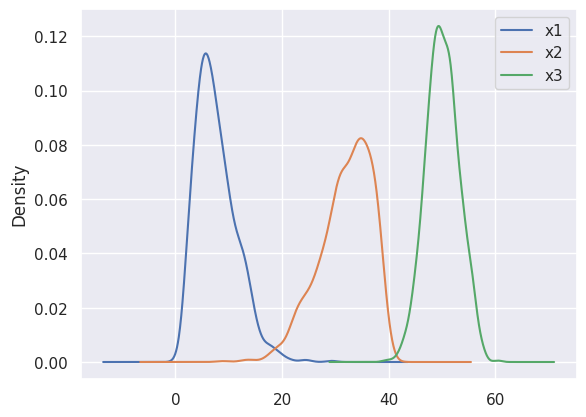

In [13]:
df.plot.kde()

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
mm = MinMaxScaler()
data_tf = mm.fit_transform(df)

<Axes: ylabel='Density'>

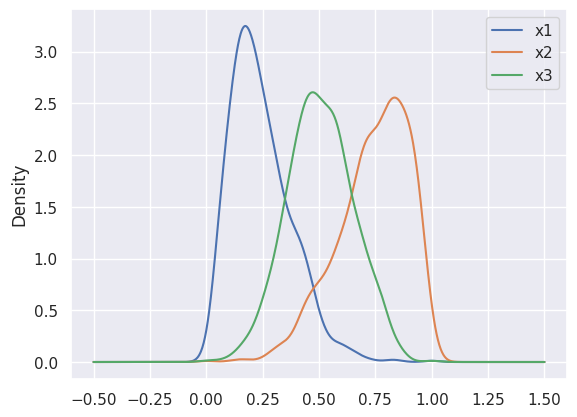

In [16]:
df = pd.DataFrame(data_tf,columns=['x1','x2','x3'])
df.plot.kde()

## 4. Robust Scaler
* Suited for data with outliers
* Calculate by subtracting 1st-quartile & div by difference between 3rd-quartile & 1st-quartile






<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp2.PNG?raw=true">

In [17]:
df = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

In [18]:
df

,x1,x2
0,20.140998,30.217030
1,19.805238,29.671178
2,19.293949,29.745848
3,20.798934,30.910422
4,21.104684,30.908123
...,...,...
1020,-0.929582,49.277844
1021,1.375452,50.411858
1022,2.321199,51.573108
1023,0.139945,50.212704


<Axes: ylabel='Density'>

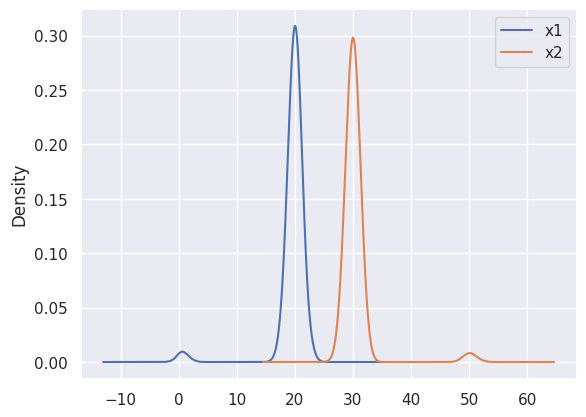

In [19]:
df.plot.kde()

In [20]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()

In [21]:
data_tf = robustscaler.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2'])

<Axes: ylabel='Density'>

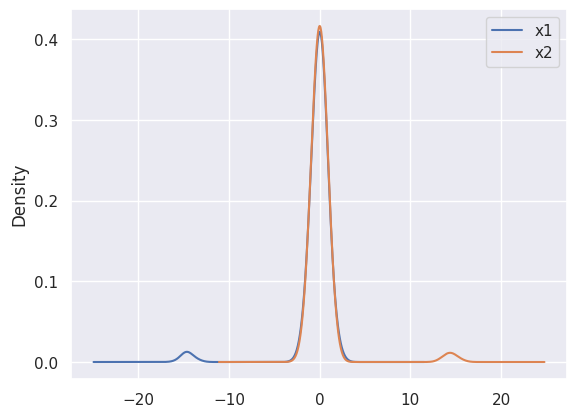

In [22]:
df.plot.kde()

In [23]:
# RobustScaler is for to handle outliers 

## 5. Normalizer
* Each parameter value is obtained by dividing by magnitude


<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp1.PNG?raw=true">
* Centralizes data to origin 

In [31]:
df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

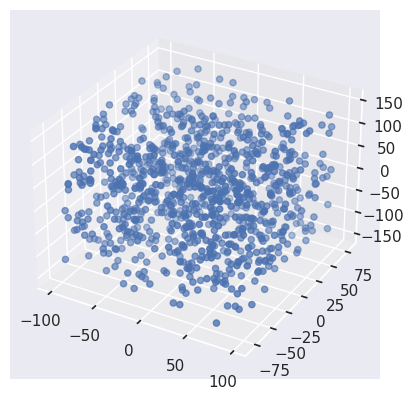

In [32]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

In [33]:
from sklearn.preprocessing import Normalizer

In [34]:
normalizer = Normalizer()
data_tf = normalizer.fit_transform(df)

In [35]:
df = pd.DataFrame(data_tf, columns=['x1','y1','z1'])

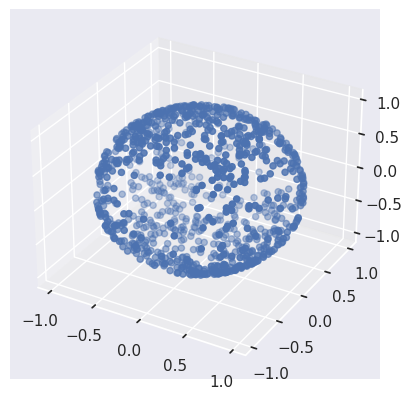

In [36]:
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

## 6. Binarization
* Thresholding numerical values to binary values ( 0 or 1 )
* A few learning algorithms assume data to be in Bernoulli distribution - Bernoulli's Naive Bayes

In [37]:
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])

In [38]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()

In [39]:
data_tf = binarizer.fit_transform(X)

In [40]:
data_tf

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

### Comparison of these 5 scalers 

### 1. StandardScaler


* Use case: When your data follows a Gaussian (normal) distribution or approximately normal distribution.
* How it works: It standardizes features by removing the mean and scaling to unit variance.
$$ z = \frac{x - \mu}{\sigma} $$

* Best suited for: Algorithms that assume data is normally distributed or sensitive to feature magnitudes, such as:
    * Linear Regression
    * Logistic Regression
    * Support Vector Machines (SVM)
    * Principal Component Analysis (PCA)
    * k-Nearest Neighbors (KNN)

### 2. MinMaxScaler
* Use case: When your data does not follow a normal distribution and you want to scale features to a fixed range, typically [0, 1].
* How it works: It scales the data to a given range, often between 0 and 1, using the formula:
$$ x_{\text{scaled}} = \frac{x - x_{\min}}{x_{\max} - x_{\min}} $$
* Best suited for: Algorithms that rely on the distances between data points, such as:
    * Neural Networks (e.g., deep learning models)
    * K-Means Clustering
    * K-Nearest Neighbors (KNN)

### 3. RobustScaler

* Use case: When your data contains many outliers, as it is robust to outliers by scaling according to the interquartile range.
* How it works: It centers the data around the median and scales it according to the interquartile range (IQR).
$$ x_{\text{scaled}} = \frac{x - \text{median}}{\text{IQR}} $$
* Best suited for: Datasets with significant outliers, where traditional methods like StandardScaler or MinMaxScaler could be skewed by extreme values.


### 4. Normalizer

* Use case: When you want to scale each sample (row) individually rather than each feature (column) to have a unit norm (often in clustering or text classification).
* How it works: It scales individual samples (rows) so that the norm (magnitude) of the sample is 1.
$$ x_{\text{normalized}} = \frac{x}{\|x\|} $$
​where 
∥
𝑥
∥
∥x∥ is the Euclidean norm (or other norms like 
𝐿
1
L1 or 
𝐿
2
L2).
* Best suited for:
    * Text classification (e.g., TF-IDF matrices)
    * Clustering algorithms (e.g., K-Means)
    * Data with varying magnitudes but similar patterns.

### 5. Binarization

* Use case: When you want to threshold your features into binary values (0 or 1), especially useful in preprocessing data for certain binary classification problems.
* How it works: It applies a threshold to the data; values above the threshold are set to 1, and values below the threshold are set to 0.
$$ x_{\text{binary}} = 
\begin{cases} 
1 & \text{if } x > \text{threshold} \\
0 & \text{otherwise}
\end{cases}
$$
* Best suited for:
    * Feature engineering for binary classification models
    * Models that expect binary input data, such as some rule-based models.

## 7. Encoding Categorical Values 
#### Encoding Ordinal Values
* Ordinal Values - Low, Medium & High. Relationship between values
* LabelEncoding with right mapping

In [41]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High']})

In [42]:
df

,Age,Income
0,33,Low
1,44,Low
2,22,High
3,44,Medium
4,55,Medium
5,22,High


In [43]:
df.Income.map({'Low':1,'Medium':2,'High':3})

0    1
1    1
2    3
3    2
4    2
5    3
Name: Income, dtype: int64

#### PS: We can use transformer class for this as well, we will see that later

#### Encoding Nominal Values
* Nominal Values - Male, Female. No relationship between data
* One Hot Encoding for converting data into one-hot vector

In [44]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Gender':['Male','Female','Male','Female','Male','Male']})

In [45]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [46]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [47]:
le = LabelEncoder()
df['gender_tf'] = le.fit_transform(df.Gender)

In [48]:
df

,Age,Gender,gender_tf
0,33,Male,1
1,44,Female,0
2,22,Male,1
3,44,Female,0
4,55,Male,1
5,22,Male,1


In [49]:
OneHotEncoder().fit_transform(df[['gender_tf']]).toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

## 8. Imputation
* Missing values cannot be processed by learning algorithms
* Imputers can be used to infer value of missing data from existing data

In [56]:
df = pd.DataFrame({
    'A':[1,2,3,4,np.nan,7],
    'B':[3,4,1,np.nan,4,5]
})

In [57]:
df

,A,B
0,1.0,3.0
1,2.0,4.0
2,3.0,1.0
3,4.0,NaN
4,NaN,4.0
5,7.0,5.0


In [58]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [59]:
imputer.fit_transform(df)

array([[1. , 3. ],
       [2. , 4. ],
       [3. , 1. ],
       [4. , 3.4],
       [3.4, 4. ],
       [7. , 5. ]])

In [67]:
from sklearn.impute import SimpleImputer
imputer_median = SimpleImputer(missing_values=np.nan, strategy="median")
df["B"] = imputer_median.fit_transform(df[["B"]])
df

,A,B
0,1.0,3.0
1,2.0,4.0
2,3.0,1.0
3,4.0,4.0
4,NaN,4.0
5,7.0,5.0


## 9. Polynomial Features
* Deriving non-linear feature by coverting data into higher degree
* Used with polynomial regression to learn model of higher degree

In [68]:
df = pd.DataFrame({'A':[1,2,3,4,5], 'B':[2,3,4,5,6]})
df

,A,B
0,1,2
1,2,3
2,3,4
3,4,5
4,5,6


In [78]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=2, include_bias=False)

In [79]:
X_poly = pol.fit_transform(df)

In [80]:
print(pd.DataFrame(X_poly, columns=pol.get_feature_names_out()))

     A    B   A^2   A B   B^2
0  1.0  2.0   1.0   2.0   4.0
1  2.0  3.0   4.0   6.0   9.0
2  3.0  4.0   9.0  12.0  16.0
3  4.0  5.0  16.0  20.0  25.0
4  5.0  6.0  25.0  30.0  36.0


## 10. Custom Transformer 
* Often, you will want to convert an existing Python function into a transformer to assist in data cleaning or processing.
* FunctionTransformer is used to create one Transformer 
* validate = False, is required for string columns

In [81]:
from sklearn.preprocessing import FunctionTransformer

In [82]:
def mapping(x):
    x['Age'] = x['Age']+2
    x['Counter'] = x['Counter'] * 2
    return x

In [83]:
customtransformer = FunctionTransformer(mapping, validate=False)

In [84]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Counter':[3,4,2,4,5,2],
     })
df

,Age,Counter
0,33,3
1,44,4
2,22,2
3,44,4
4,55,5
5,22,2


In [85]:
customtransformer.transform(df)

,Age,Counter
0,35,6
1,46,8
2,24,4
3,46,8
4,57,10
5,24,4


## 11. Text Processing
* Perhaps one of the most common information
* Learning algorithms don't understand text but only numbers
* Below menthods convert text to numbers

## 12. CountVectorizer
* Each column represents one word, count refers to frequency of the word
* Sequence of words are not maintained

#### Hyperparameters
* n_grams - Number of words considered for each column
* stop_words - words not considered
* vocabulary - only words considered


In [100]:
corpus = [
     'This is the first document awesome food.',
     'This is the second second document.',
     'And the third one the is mission impossible. and and and ',
     'Is this the first document?',
]
df = pd.DataFrame({'Text':corpus})
df

,Text
0,This is the first document awesome food.
1,This is the second second document.
2,And the third one the is mission impossible. a...
3,Is this the first document?


In [101]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [106]:
cv.fit_transform(df.Text).toarray()
# df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


array([[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1],
       [4, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1]])

In [103]:
cv.vocabulary_

{'this': 12,
 'is': 6,
 'the': 10,
 'first': 3,
 'document': 2,
 'awesome': 1,
 'food': 4,
 'second': 9,
 'and': 0,
 'third': 11,
 'one': 8,
 'mission': 7,
 'impossible': 5}

In [ ]:
cv = CountVectorizer(stop_words=['the','is'])
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]])

In [ ]:
cv.vocabulary_

{'and': 0,
 'awesome': 1,
 'document': 2,
 'first': 3,
 'food': 4,
 'impossible': 5,
 'mission': 6,
 'one': 7,
 'second': 8,
 'third': 9,
 'this': 10}

In [ ]:
cv = CountVectorizer(vocabulary=['mission','food','second'])
cv.fit_transform(df.Text).toarray()

array([[0, 1, 0],
       [0, 0, 2],
       [1, 0, 0],
       [0, 0, 0]])

In [ ]:
cv = CountVectorizer(ngram_range=[1,2])
cv.fit_transform(df.Text).toarray()

array([[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2,
        0, 1, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 0, 1]])

In [ ]:
cv.vocabulary_

{'and': 0,
 'and the': 1,
 'awesome': 2,
 'awesome food': 3,
 'document': 4,
 'document awesome': 5,
 'first': 6,
 'first document': 7,
 'food': 8,
 'impossible': 9,
 'is': 10,
 'is mission': 11,
 'is the': 12,
 'is this': 13,
 'mission': 14,
 'mission impossible': 15,
 'one': 16,
 'one the': 17,
 'second': 18,
 'second document': 19,
 'second second': 20,
 'the': 21,
 'the first': 22,
 'the is': 23,
 'the second': 24,
 'the third': 25,
 'third': 26,
 'third one': 27,
 'this': 28,
 'this is': 29,
 'this the': 30}

In [86]:
from sklearn.feature_extraction.text import CountVectorizer


In [93]:
corpus = [
    'The cat sat on the mat',
    'The dog chased the cat',
    'The dog and the cat sat on the mat',
    'The cat chased the dog',
    'The mat was sat on by the cat'
]


In [107]:
vectorizer = CountVectorizer()

# Fit and transform the corpus (i.e., convert text to a matrix of token counts)
X = vectorizer.fit_transform(corpus)

# Get feature names (vocabulary)
print(vectorizer.get_feature_names_out())

# Convert the matrix into a readable DataFrame
import pandas as pd
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(df)

['and' 'awesome' 'document' 'first' 'food' 'impossible' 'is' 'mission'
 'one' 'second' 'the' 'third' 'this']
   and  awesome  document  first  food  impossible  is  mission  one  second  \
0    0        1         1      1     1           0   1        0    0       0   
1    0        0         1      0     0           0   1        0    0       2   
2    4        0         0      0     0           1   1        1    1       0   
3    0        0         1      1     0           0   1        0    0       0   

   the  third  this  
0    1      0     1  
1    1      0     1  
2    2      1     0  
3    1      0     1  


In [104]:
cv.vocabulary_
vectorizer.vocabulary_

{'the': 8,
 'cat': 2,
 'sat': 7,
 'on': 6,
 'mat': 5,
 'dog': 4,
 'chased': 3,
 'and': 0,
 'was': 9,
 'by': 1}

## 13. TfId fVectorizer
TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.

* Words occuring more frequently in a doc versus entire corpus is considered more important
* The importance is in scale of 0 & 1

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

In [ ]:
vectorizer.fit_transform(df.Text).toarray()

array([[0.64450299, 0.41137791, 0.64450299, 0.        , 0.        ,
        0.        ],
       [0.        , 0.30403549, 0.        , 0.        , 0.        ,
        0.9526607 ],
       [0.        , 0.        , 0.        , 0.70710678, 0.70710678,
        0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [ ]:
vectorizer.get_feature_names()

['awesome', 'document', 'food', 'impossible', 'mission', 'second']

## 14. HashingVectorizer
* All above techniques converts data into table where each word is converted to column
* Learning on data with millions of columns is difficult to process
* HashingVectorizer is an useful technique for out-of-core learning
* Multiple words are hashed to limited column
* Limitation - Hashed value to word mapping is not possible

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=5)

In [ ]:
hv.fit_transform(df.Text).toarray()

array([[ 0.        , -0.37796447,  0.75592895, -0.37796447,  0.37796447],
       [ 0.81649658,  0.        ,  0.40824829, -0.40824829,  0.        ],
       [-0.31622777,  0.        ,  0.31622777, -0.63245553, -0.63245553],
       [ 0.        , -0.57735027,  0.57735027, -0.57735027,  0.        ]])

## 15. Image Processing using skimage
* skimage doesn't come with anaconda. install with 'pip install skimage'
* Images should be converted from 0-255 scale to 0-1 scale.
* skimage takes image path & returns numpy array
* images consist of 3 dimension


In [ ]:
from skimage.io import imread,imshow

In [ ]:
image = imread('/content/google-css-images-1515761601.jpg')

In [ ]:
image.shape  #height, width, colors range

(317, 640, 3)

In [ ]:
image[0]

array([[51, 51, 51],
       [51, 51, 51],
       [51, 51, 51],
       ...,
       [51, 51, 51],
       [51, 51, 51],
       [51, 51, 51]], dtype=uint8)

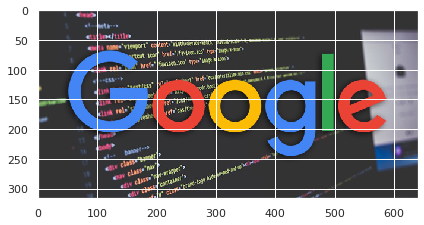

In [ ]:
imshow(image)

In [ ]:
from skimage.color import rgb2gray

In [ ]:
rgb2gray(image).shape

(317, 640)

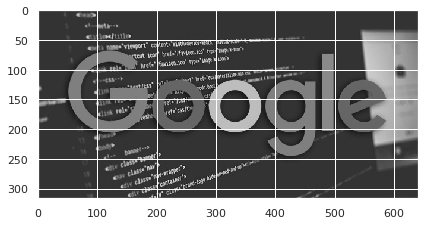

In [ ]:
imshow(rgb2gray(image))

In [ ]:
from skimage.transform import resize

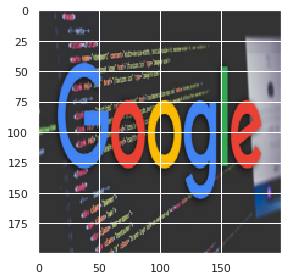

In [ ]:
imshow(resize(image, (200,200)))